In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("/Users/saura/Downloads/Fraud_check.csv")


In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()

In [7]:
df['Undergrad']=Encoder.fit_transform(df["Undergrad"])
df['Marital.Status']=Encoder.fit_transform(df["Marital.Status"])
df['Urban']=Encoder.fit_transform(df["Urban"])

In [8]:
df1=df.copy()
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1


In [9]:
#creating target variable in 0s & 1s 0=GOOD 1=Risky
df1['Taxable.Income']=(df1['Taxable.Income']<=30000)*1

In [10]:
df1['Taxable.Income'].unique()

array([0, 1])

In [11]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [12]:
#dividing data into x & y variable 
x=df.iloc[:,[0,1,3,4,5]]
y=df1['Taxable.Income']

In [13]:
#spliting data into training and testing
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)


Building Decision Tree Classifier using Entropy Criteria 

In [15]:
from sklearn.tree import DecisionTreeClassifier


In [16]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
#plot the decision tree
from sklearn import tree
import  matplotlib.pyplot as  plt

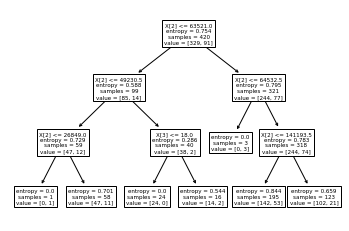

In [18]:
tree.plot_tree(model);

In [19]:
model.feature_importances_

array([0.        , 0.        , 0.87265897, 0.12734103, 0.        ])

In [20]:
# predicting on test data set 
preds = model.predict(x_test) 

# getting the count of each category 
pd.Series(preds).value_counts() 

0    177
1      3
dtype: int64

In [21]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable.Income,,
0,145,2
1,32,1


In [22]:
# Accuracy 
np.mean(preds==y_test)*100

81.11111111111111

Building Decision Tree Classifier (CART)using Gini Criteria

In [23]:
model_gini=DecisionTreeClassifier(criterion="gini",max_depth=2)


In [24]:
model_gini.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=2)

In [25]:
pred=model_gini.predict(x_test)


In [26]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [27]:
# Accuracy 
np.mean(pred==y_test)

0.8111111111111111

In [28]:
pd.crosstab(y_test,pred)


col_0,0,1
Taxable.Income,,
0,145,2
1,32,1


Decision tree model C5.0 & CART by max_depth =3 it gives same Accuracy 81.11%